Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!


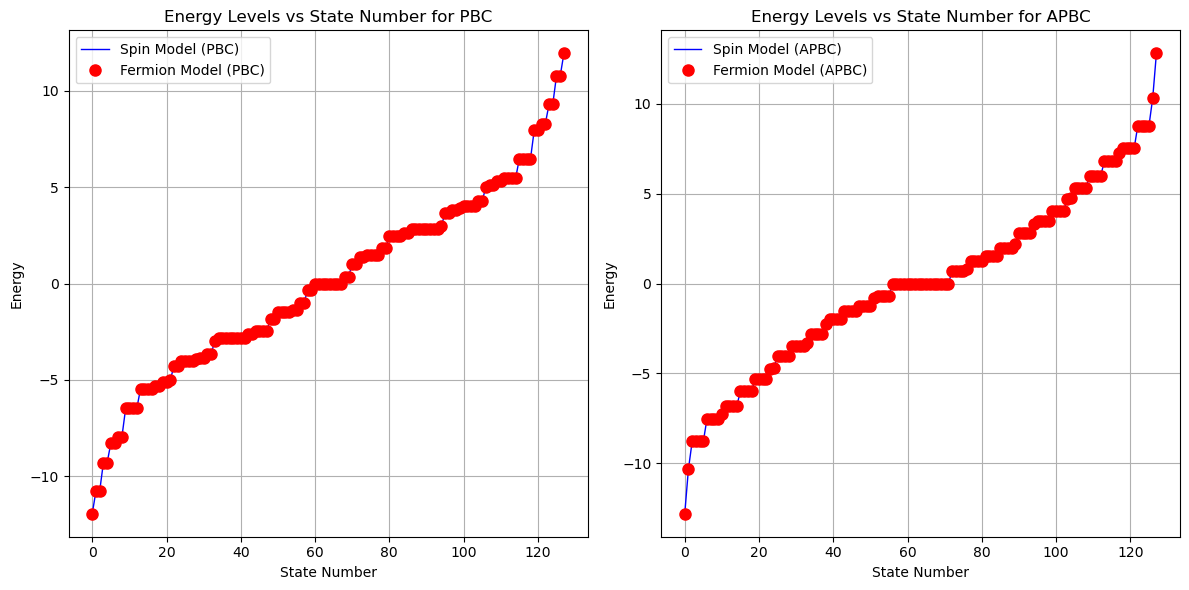

In [5]:
from quspin.operators import hamiltonian  # Hamiltonians and operators
from quspin.basis import spin_basis_1d, spinless_fermion_basis_1d  # Hilbert space spin basis
import numpy as np
import matplotlib.pyplot as plt

L = 8  # system size number of sites (or spins) in the 1D lattice.
J = 1.0  # spin zz interaction interaction strength between neighboring spins (in the spin model) or between neighboring fermions (in the fermion model).
h = np.sqrt(2)  # external magnetic field strength

# Set up the figure
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # Two subplots side by side

for ax, zblock, PBC, title in zip(axs, [-1, 1], [1, -1], ['PBC', 'APBC']): # PBC - Periodic boundary condition APBC- Aperiodic Boundary condition

    ##### Define spin model #####
    # Site-coupling lists
    h_field = [[-h, i] for i in range(L)] # action of magnetic filed on each site 
    J_zz = [[-J, i, (i + 1) % L] for i in range(L)] #  representing the interaction between neighboring spins. The term (i + 1) % L ensures periodic boundary conditions by wrapping around the lattice

    # Define spin static and dynamic lists
    static_spin = [["zz", J_zz], ["x", h_field]]  #  "zz" term refers to the interaction between neighboring spins, and the "x" term refers to the interaction of each spin with the external magnetic field.
    dynamic_spin = [] # empty since hamiltonian time independent

    # Construct spin basis in pos/neg spin inversion sector
    basis_spin = spin_basis_1d(L=L, zblock=zblock) # Defines the Hilbert space basis for the spin system, taking into account the system size L and the zblock symmetry.

    # Build spin Hamiltonian
    H_spin = hamiltonian(static_spin, dynamic_spin, basis=basis_spin, dtype=np.float64, check_symm=False)
# Constructs the Hamiltonian matrix for the spin system using the defined interactions, basis, and the data type np.float64 for double-precision floating-point numbers. check_symm=False disables automatic symmetry checks.
    
    # Calculate spin energy levels
    E_spin = H_spin.eigvalsh() 
    # Computes the eigenvalues (energy levels) of the spin Hamiltonian, which represent the possible energies of the system.

    # Plot spin energy levels
    ax.plot(E_spin, label=f'Spin Model ({title})', color='blue', linewidth=1)
    # 

    ##### Define fermion model #####
    h_pot = [[2.0 * h, i] for i in range(L)]
    # A list representing the potential energy at each site due to the magnetic field, scaled by a factor of 2.

    if PBC == 1:  # Periodic BC: odd particle number subspace only
        J_pm = [[-J, i, (i + 1) % L] for i in range(L)]
# J_pm: This list represents a type of hopping interaction where a fermion hops from site i to site i+1, decreasing the spin state on site i (denoted by "-") and increasing the spin state on site i+1 (denoted by "+").
# -J: The negative sign indicates that this hopping interaction decreases the system's energy when it occurs. The magnitude J is the strength of this interaction.
# i: The starting site of the interaction.
# (i + 1) % L: The ending site of the interaction. The % L part ensures that when i is the last site (i = L-1), the interaction wraps around to the first site (i = 0), enforcing periodic boundary conditions.
        J_mp = [[+J, i, (i + 1) % L] for i in range(L)]
#J_mp: This list represents the opposite hopping interaction where a fermion hops from site i+1 to site i, decreasing the spin state on site i+1 ("-") and increasing it on site i ("+").
#+J: The positive sign indicates that this hopping interaction increases the system's energy when it occurs.
#i: The starting site of the interaction.
#(i + 1) % L: The ending site, with the same periodic boundary condition as described above.
        J_pp = [[-J, i, (i + 1) % L] for i in range(L)]
#J_pp: This list represents a different kind of interaction where both site i and site i+1 increase their spin states (denoted by "++").
#-J: The negative sign here again implies that this interaction decreases the system's energy.
#i: The starting site of the interaction.
#(i + 1) % L: The ending site, with periodic boundary conditions applied.
        J_mm = [[+J, i, (i + 1) % L] for i in range(L)]
#J_mm: This list represents an interaction where both site i and site i+1 decrease their spin states (denoted by "--").
#+J: The positive sign indicates that this interaction increases the system's energy.
#i: The starting site of the interaction.
#(i + 1) % L: The ending site, again with periodic boundary conditions applied.

        
        # Construct fermion basis in the odd particle number subsector
        basis_fermion = spinless_fermion_basis_1d(L=L, Nf=range(1, L + 1, 2))

    elif PBC == -1:  # Anti-periodic BC: even particle number subspace only
        J_pm = [[-J, i, i + 1] for i in range(L - 1)]
        J_mp = [[+J, i, i + 1] for i in range(L - 1)]
        J_pp = [[-J, i, i + 1] for i in range(L - 1)]
        J_mm = [[+J, i, i + 1] for i in range(L - 1)]

        # Add boundary coupling between sites (L-1, 0)
        J_pm.append([+J, L - 1, 0])  # APBC
        J_mp.append([-J, L - 1, 0])  # APBC
        J_pp.append([+J, L - 1, 0])  # APBC
        J_mm.append([-J, L - 1, 0])  # APBC

        # Construct fermion basis in the even particle number subsector
        basis_fermion = spinless_fermion_basis_1d(L=L, Nf=range(0, L + 1, 2))

    # Define fermionic static and dynamic lists
    static_fermion = [["+-", J_pm], ["-+", J_mp], ["++", J_pp], ["--", J_mm], ["z", h_pot]]
# static_fermion: Defines the static part of the Hamiltonian for the fermion model, including different types of hopping interactions and the potential energy term.
    dynamic_fermion = []

    # Build fermionic Hamiltonian
    H_fermion = hamiltonian(static_fermion, dynamic_fermion, basis=basis_fermion,
                            dtype=np.float64, check_pcon=False, check_symm=False)  # hamiltonian

    # Calculate fermionic energy levels
    E_fermion = H_fermion.eigvalsh() # eigemvalue

    # Plot fermionic energy levels with large dots
    ax.plot(E_fermion, 'o', label=f'Fermion Model ({title})', color='red', markersize=8)

    # Add labels and legend
    ax.set_xlabel('State Number')
    ax.set_ylabel('Energy')
    ax.set_title(f'Energy Levels vs State Number for {title}')
    ax.legend()
    ax.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
